In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
uploaded = files.upload()

Saving agaricus-lepiota.txt to agaricus-lepiota (1).txt


In [ ]:
data = pd.read_csv("agaricus-lepiota.txt", sep=",")
print(data.head())

   Poisonous  CapShape  CapSurface  CapColor  Bruises  Odor  GillAttach  \
0          1         2           3         0        0     7           2   
1          0         2           3         9        0     0           2   
2          0         0           3         8        0     1           2   
3          1         2           2         8        0     7           2   
4          0         2           3         3        1     6           2   

   GillSpacing  GillSize  GillColor  ...  StalkSurfaceBelowRing  \
0            0         1          0  ...                      3   
1            0         0          0  ...                      3   
2            0         0          1  ...                      3   
3            0         1          1  ...                      3   
4            1         0          0  ...                      3   

   StalkColorAboveRing  StalkColorBelowRing  VeilType  VeilColor  RingNumber  \
0                    7                    7         0          2  

In [ ]:
data.describe()

,Poisonous,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttach,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.381999,2.353650,1.457123,4.683912,0.435861,4.562013,1.993622,0.181432,0.124734,5.194543,...,2.387668,5.189227,5.129695,0.0,2.001417,1.014883,3.950390,1.467753,3.712970,3.326719
std,0.485919,0.771883,1.208440,3.388802,0.495913,1.993668,0.112776,0.385410,0.330447,3.369406,...,0.955855,2.423887,2.464314,0.0,0.037625,0.165600,1.469527,1.583470,1.328741,2.645099
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000,2.000000,0.000000,0.000000,3.000000,...,2.000000,3.000000,3.000000,0.0,2.000000,1.000000,3.000000,0.000000,3.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,0.000000,6.000000,2.000000,0.000000,0.000000,7.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,5.000000,1.000000,4.000000,4.000000
75%,1.000000,3.000000,2.000000,8.000000,1.000000,6.000000,2.000000,0.000000,0.000000,8.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,5.000000,3.000000,5.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,7.000000,2.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,5.000000,7.000000,5.000000,6.000000


In [ ]:
X = data.drop("Poisonous", axis=1)
y = data["Poisonous"]

In [ ]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
5639    0
5640    0
5641    0
5642    1
5643    1
Name: Poisonous, Length: 5644, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
X_train.shape

(2822, 22)

In [ ]:
X_test.shape

(2822, 22)

In [ ]:
clf = CategoricalNB()

In [ ]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.96113074, 0.96113074, 0.95035461, 0.96808511, 0.9787234 ,
       0.96453901, 0.95744681, 0.96099291, 0.94680851, 0.95744681])

In [ ]:
np.mean(cross_val_score(clf, X_train, y_train, cv=10))

0.9606658647219508

In [ ]:
clf.fit(X_train, y_train)

CategoricalNB()

In [ ]:
clf.predict_proba(X_test)

array([[9.99976939e-01, 2.30612145e-05],
       [9.99998306e-01, 1.69356185e-06],
       [9.99999595e-01, 4.05144288e-07],
       ...,
       [4.55498541e-19, 1.00000000e+00],
       [1.01070191e-21, 1.00000000e+00],
       [9.99999775e-01, 2.25095085e-07]])

In [ ]:
print(clf.score(X_test,y_test))

0.9477911646586346


In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 1 1 0]


In [ ]:
y_pred.shape

(4233,)

In [ ]:
testerror = mean_squared_error(y_test, y_pred)
print(testerror)

0.05220883534136546


In [ ]:
testacc = accuracy_score(y_test, y_pred)
print(testacc)

0.9477911646586346


In [ ]:
y_predtrain = clf.predict(X_train)
trainerror = mean_squared_error(y_train, y_predtrain)
print(trainerror)

0.04323175053153792


In [ ]:
trainacc = accuracy_score(y_train, y_predtrain)
print(trainacc)

0.9567682494684621


In [ ]:
cm = confusion_matrix(y_test, y_pred)

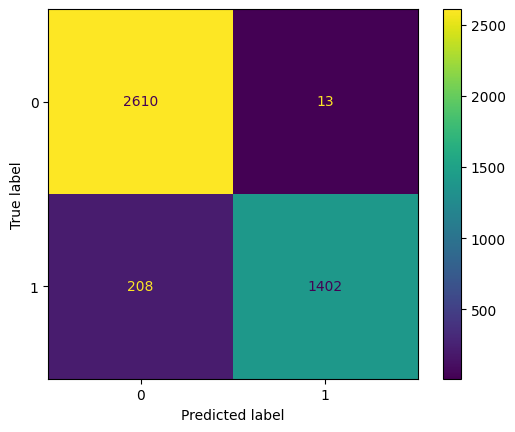

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2623
           1       0.99      0.87      0.93      1610

    accuracy                           0.95      4233
   macro avg       0.96      0.93      0.94      4233
weighted avg       0.95      0.95      0.95      4233

